# Case study on Unsupervised Learning
Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
   the optimum number of clusters.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore") 

In [2]:
##Read the dataset to the python environment
data=pd.read_csv('Wine.csv')
data.head()


Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [3]:
data.shape

(178, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.describe() 

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

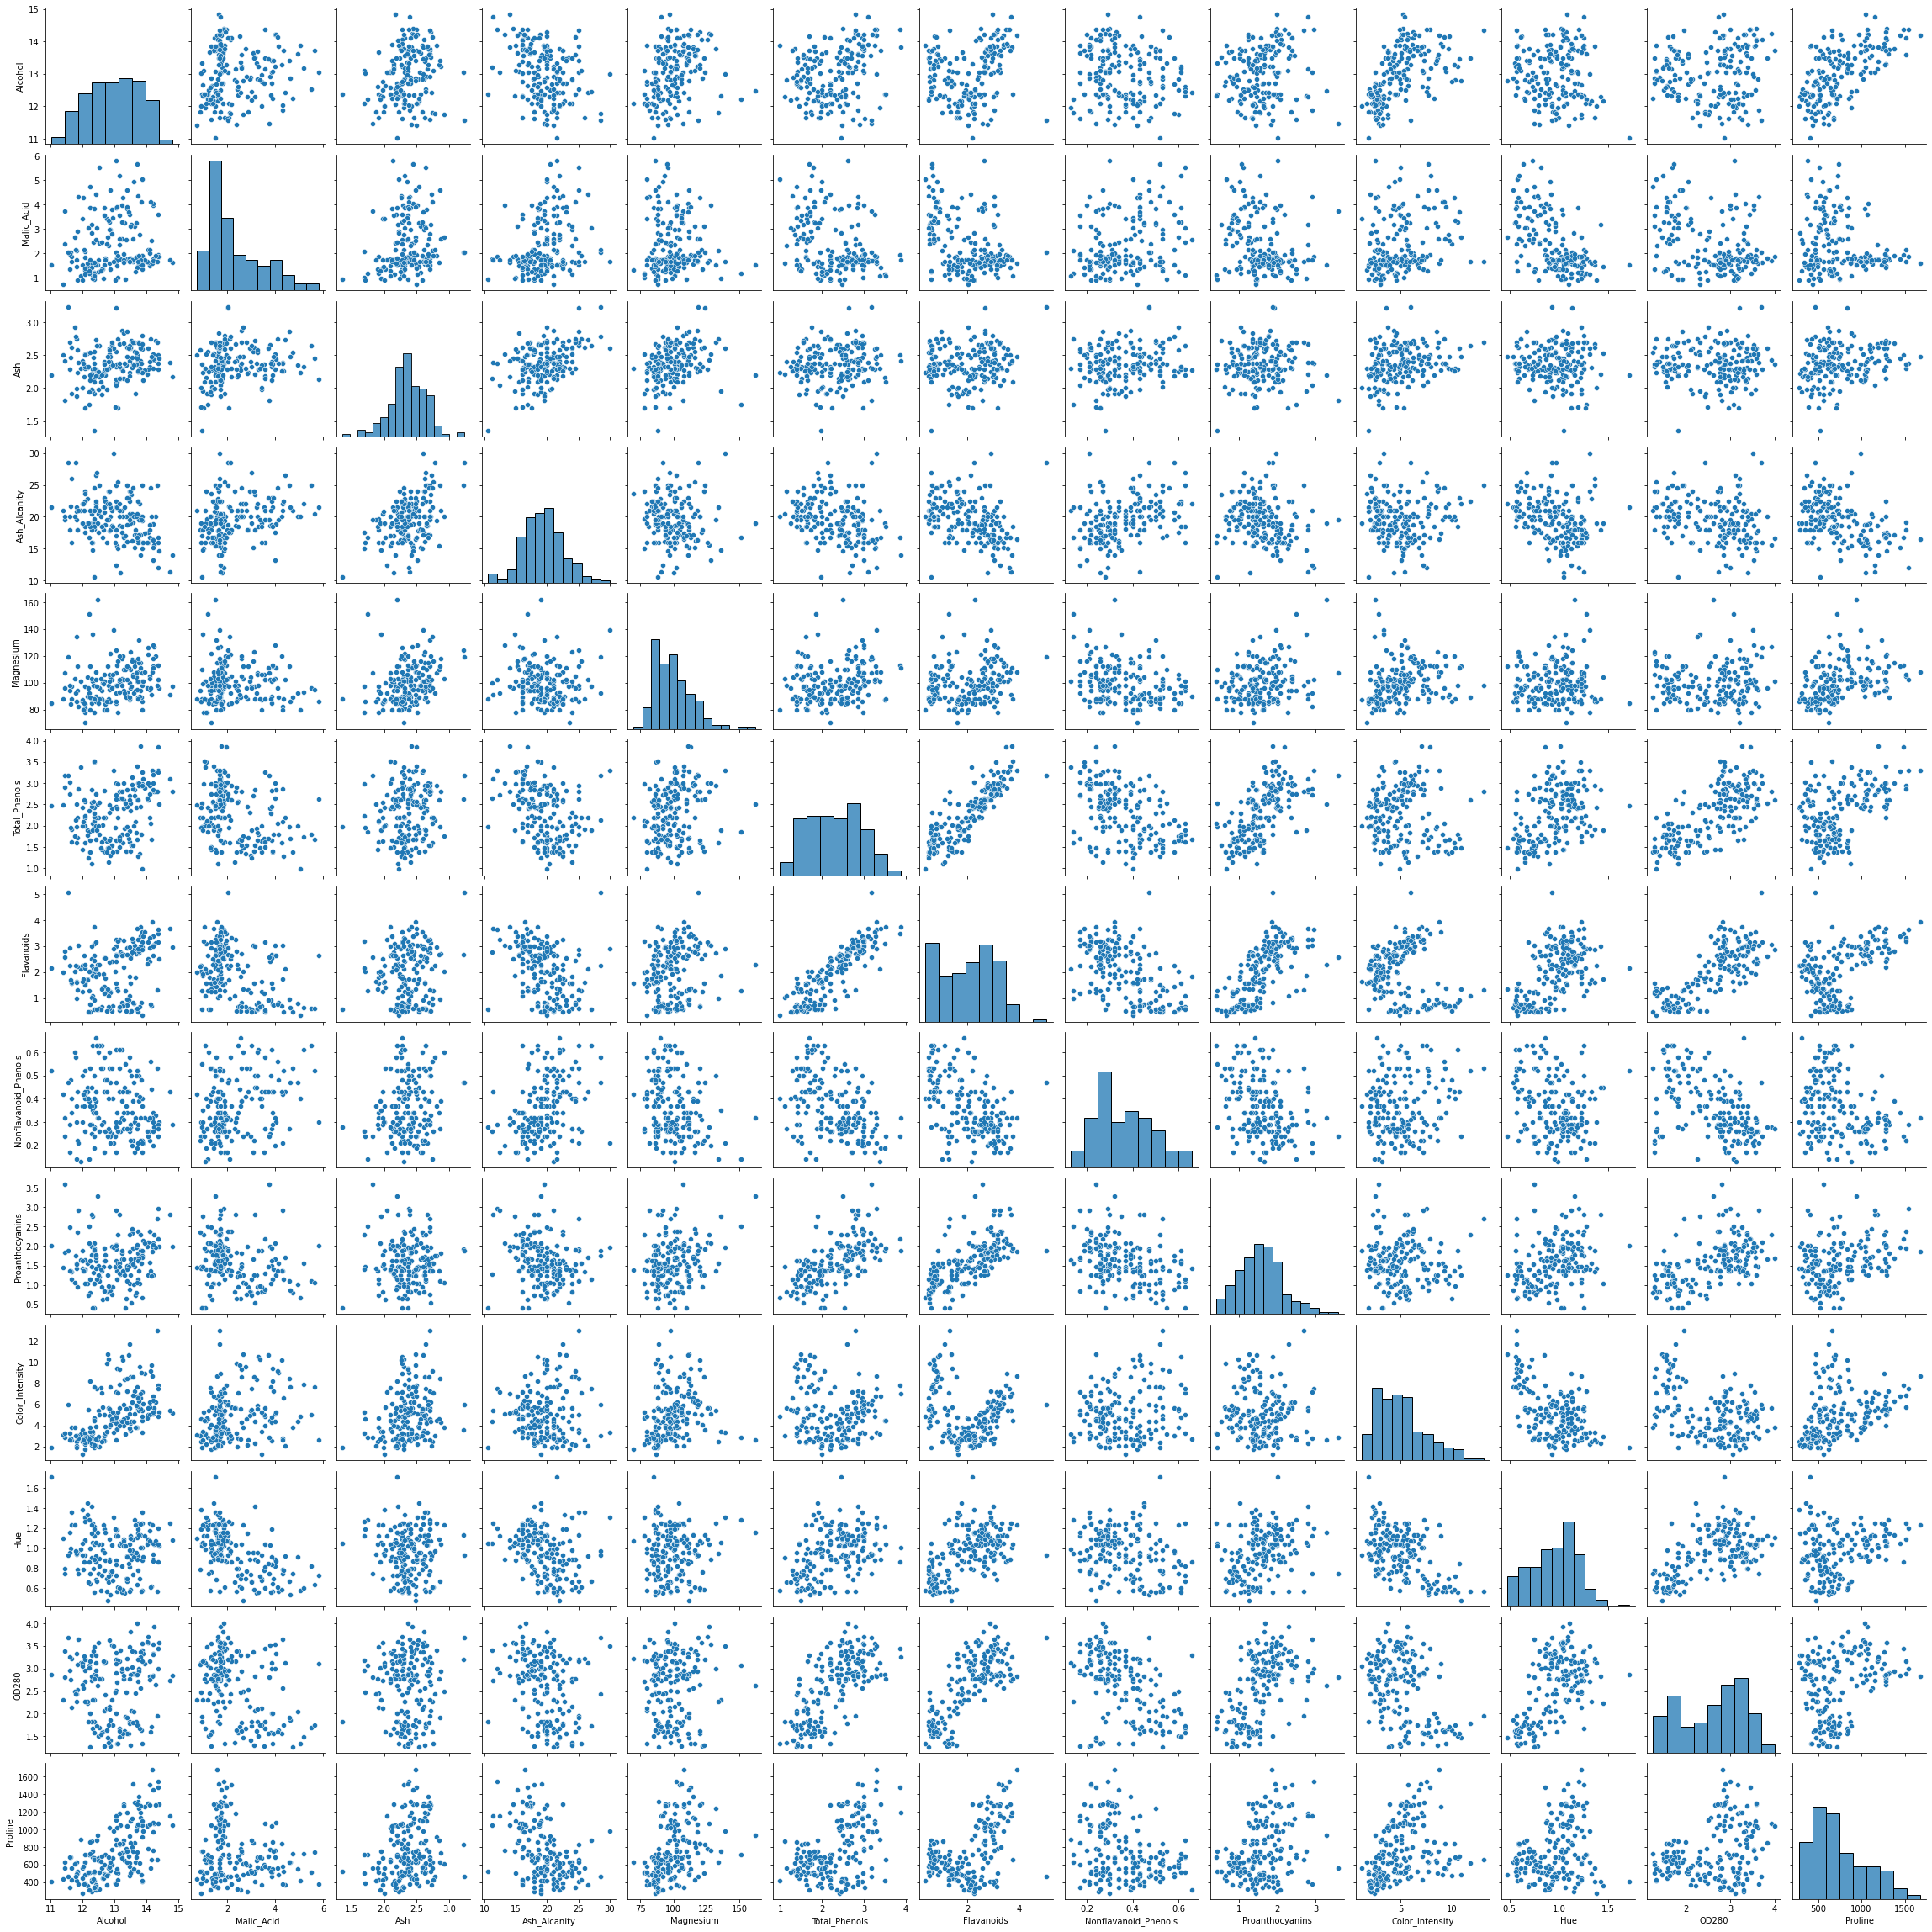

In [7]:
sns.pairplot(data)

Normalization

In [8]:
from sklearn.preprocessing import Normalizer
norm_data= pd.DataFrame(Normalizer().fit_transform(data), columns=data.columns)

In [9]:
norm_data.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  0.013264    0.001594  0.002265      0.014542   0.118383       0.002610   
1  0.012513    0.001687  0.002029      0.010617   0.094794       0.002512   
2  0.011063    0.001984  0.002245      0.015636   0.084906       0.002354   
3  0.009680    0.001314  0.001684      0.011317   0.076119       0.002593   
4  0.017775    0.003477  0.003853      0.028193   0.158418       0.003759   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.002852              0.000261         0.002135         0.005257   
1    0.002616              0.000246         0.001213         0.004152   
2    0.002724              0.000252         0.002362         0.004775   
3    0.002351              0.000162         0.001468         0.005254   
4    0.003611              0.000524         0.002443         0.005800   

        Hue     OD280   Proline  
0  0.000969  0.003654  0.992738  
1  0.000995  0.003223  0.995336  
2  0.000866  0.002665  0.996176  
3  0.000579  0.002324  0.996961  
4  0.001396  0.003934  0.986753

In [10]:
norm_data.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean     0.019950    0.003711    0.003644      0.031124    0.151541   
std      0.007321    0.002499    0.001409      0.014671    0.054081   
min      0.008428    0.000944    0.001473      0.007739    0.064147   
25%      0.013548    0.001684    0.002359      0.017615    0.109775   
50%      0.018984    0.003174    0.003468      0.030036    0.146777   
75%      0.024783    0.004981    0.004506      0.040010    0.183082   
max      0.041106    0.014852    0.007305      0.069703    0.297958   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.003444    0.002973              0.000581         0.002396   
std         0.001543    0.001802              0.000327         0.001249   
min         0.001255    0.000637              0.000145         0.000554   
25%         0.002385    0.001746              0.000277         0.001515   
50%         0.002946    0.002721              0.000514         0.002030   
75%         0.003886    0.003551              0.000833         0.003040   
max         0.008404    0.010560              0.002008         0.007469   

       Color_Intensity         Hue       OD280     Proline  
count       178.000000  178.000000  178.000000  178.000000  
mean          0.007342    0.001477    0.003993    0.986018  
std           0.003843    0.000736    0.001979    0.010073  
min           0.002241    0.000579    0.001675    0.951812  
25%           0.004612    0.000970    0.002535    0.981687  
50%           0.005981    0.001232    0.003384    0.988441  
75%           0.008853    0.001834    0.004870    0.993564  
max           0.021876    0.004727    0.010858    0.997835

# K-Means Clustering

Elbow method

0.5893776280459067
0.21097561296654627
0.10306150549665624
0.0591007341301072
0.03969232820057102
0.031232108968648233
0.027180954089528406
0.023664665162120284
0.020448724450857582
0.01853787449801328


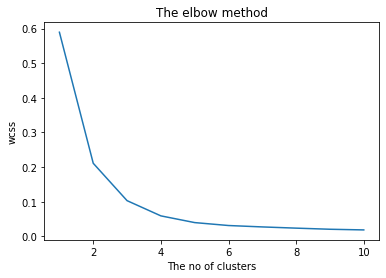

In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(norm_data)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('The no of clusters')
plt.ylabel('wcss')
plt.show()

Optimum no of clusters=3

In [12]:
cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(norm_data)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

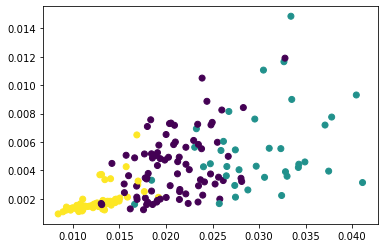

In [13]:
plt.scatter(norm_data.iloc[:,0],norm_data.iloc[:,1],c=pred_kmeans)

Agglomerative clustering

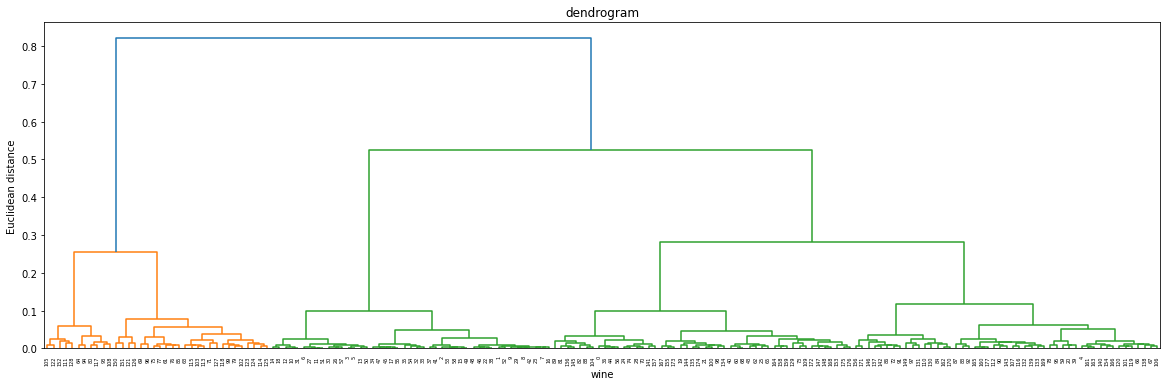

In [14]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (20, 6))
dendrogram=sch.dendrogram(sch.linkage(norm_data,method='ward'))
plt.title('dendrogram')
plt.xlabel('wine')
plt.ylabel('Euclidean distance')
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")

model_hc = hc.fit(norm_data)

HC_clusters = model_hc.labels_
HC_clusters

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

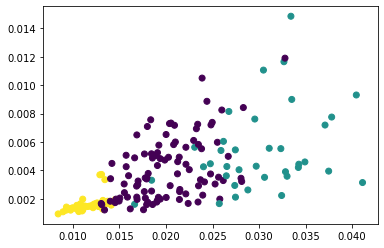

In [16]:
plt.scatter(norm_data.iloc[:,0],norm_data.iloc[:,1],c=HC_clusters)

# PCA

In [17]:
from sklearn.preprocessing import StandardScaler
data_stdscalar = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns, index = data.index)

In [18]:
data_stdscalar.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.013009  
1  0.406051  1.113449  0.965242  
2  0.318304  0.788587  1.395148  
3 -0.427544  1.184071  2.334574  
4  0.362177  0.449601 -0.037874

In [19]:
from sklearn.decomposition import PCA


In [20]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_stdscalar)

KMeans with PCA

1282.1026695794815
628.7883507554776
259.5093807511933
192.3906153023485
155.06920474891717
123.01349501833546
99.24814548387032
90.3362968072812
81.72385276099874
72.66776068221807


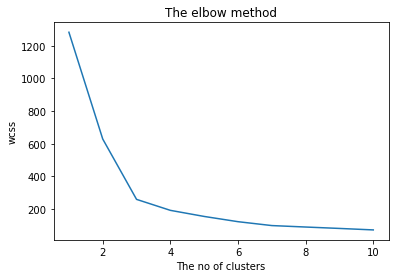

In [21]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('The no of clusters')
plt.ylabel('wcss')
plt.show()

 Optimum No of clusters=3

In [22]:
cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(data_pca)
kmeans_pca = model_kmeans.labels_
kmeans_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

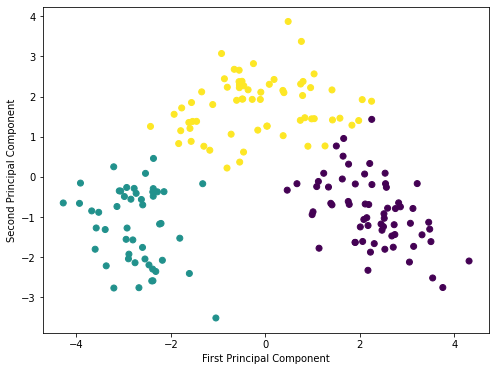

In [23]:
plt.figure(figsize =(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c =kmeans_pca)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

 Agglomerative Clustering with PCA

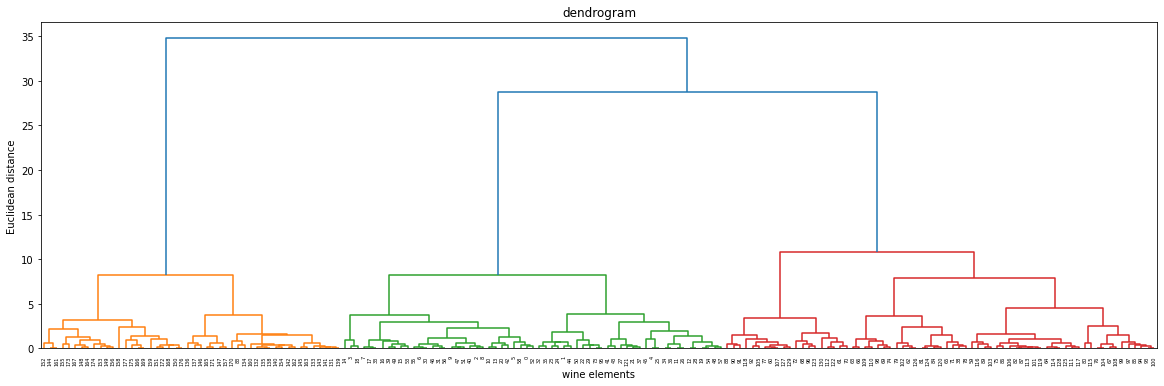

In [24]:

plt.figure(figsize = (20, 6))
dendrogram=sch.dendrogram(sch.linkage(data_pca,method='ward'))
plt.title('dendrogram')
plt.xlabel('wine elements')
plt.ylabel('Euclidean distance')
plt.show()

In [25]:

hc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")

model_hc = hc.fit(data_pca)

hc_pca= model_hc.labels_
hc_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

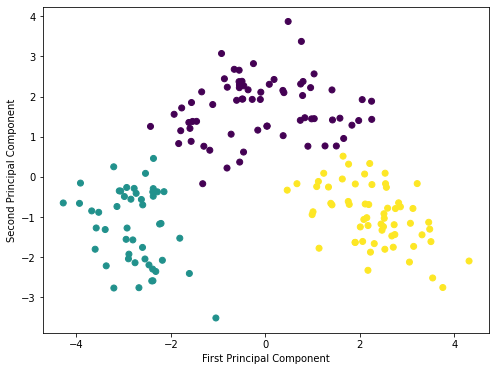

In [26]:
plt.figure(figsize =(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c =hc_pca)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [27]:
output = norm_data.copy()
output["kmeans-cluster"] = pred_kmeans
output.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  0.013264    0.001594  0.002265      0.014542   0.118383       0.002610   
1  0.012513    0.001687  0.002029      0.010617   0.094794       0.002512   
2  0.011063    0.001984  0.002245      0.015636   0.084906       0.002354   
3  0.009680    0.001314  0.001684      0.011317   0.076119       0.002593   
4  0.017775    0.003477  0.003853      0.028193   0.158418       0.003759   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.002852              0.000261         0.002135         0.005257   
1    0.002616              0.000246         0.001213         0.004152   
2    0.002724              0.000252         0.002362         0.004775   
3    0.002351              0.000162         0.001468         0.005254   
4    0.003611              0.000524         0.002443         0.005800   

        Hue     OD280   Proline  kmeans-cluster  
0  0.000969  0.003654  0.992738               2  
1  0.000995  0.003223  0.995336               2  
2  0.000866  0.002665  0.996176               2  
3  0.000579  0.002324  0.996961               2  
4  0.001396  0.003934  0.986753               0

In [28]:
output["pca-kmeans-cluster"] = kmeans_pca
output.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  0.013264    0.001594  0.002265      0.014542   0.118383       0.002610   
1  0.012513    0.001687  0.002029      0.010617   0.094794       0.002512   
2  0.011063    0.001984  0.002245      0.015636   0.084906       0.002354   
3  0.009680    0.001314  0.001684      0.011317   0.076119       0.002593   
4  0.017775    0.003477  0.003853      0.028193   0.158418       0.003759   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.002852              0.000261         0.002135         0.005257   
1    0.002616              0.000246         0.001213         0.004152   
2    0.002724              0.000252         0.002362         0.004775   
3    0.002351              0.000162         0.001468         0.005254   
4    0.003611              0.000524         0.002443         0.005800   

        Hue     OD280   Proline  kmeans-cluster  pca-kmeans-cluster  
0  0.000969  0.003654  0.992738               2                   0  
1  0.000995  0.003223  0.995336               2                   0  
2  0.000866  0.002665  0.996176               2                   0  
3  0.000579  0.002324  0.996961               2                   0  
4  0.001396  0.003934  0.986753               0                   0

In [29]:
output["agg-cluster"] = HC_clusters
output.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  0.013264    0.001594  0.002265      0.014542   0.118383       0.002610   
1  0.012513    0.001687  0.002029      0.010617   0.094794       0.002512   
2  0.011063    0.001984  0.002245      0.015636   0.084906       0.002354   
3  0.009680    0.001314  0.001684      0.011317   0.076119       0.002593   
4  0.017775    0.003477  0.003853      0.028193   0.158418       0.003759   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.002852              0.000261         0.002135         0.005257   
1    0.002616              0.000246         0.001213         0.004152   
2    0.002724              0.000252         0.002362         0.004775   
3    0.002351              0.000162         0.001468         0.005254   
4    0.003611              0.000524         0.002443         0.005800   

        Hue     OD280   Proline  kmeans-cluster  pca-kmeans-cluster  \
0  0.000969  0.003654  0.992738               2                   0   
1  0.000995  0.003223  0.995336               2                   0   
2  0.000866  0.002665  0.996176               2                   0   
3  0.000579  0.002324  0.996961               2                   0   
4  0.001396  0.003934  0.986753               0                   0   

   agg-cluster  
0            0  
1            2  
2            2  
3            2  
4            0

In [30]:
output["agg_pca"] = hc_pca
output.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  0.013264    0.001594  0.002265      0.014542   0.118383       0.002610   
1  0.012513    0.001687  0.002029      0.010617   0.094794       0.002512   
2  0.011063    0.001984  0.002245      0.015636   0.084906       0.002354   
3  0.009680    0.001314  0.001684      0.011317   0.076119       0.002593   
4  0.017775    0.003477  0.003853      0.028193   0.158418       0.003759   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.002852              0.000261         0.002135         0.005257   
1    0.002616              0.000246         0.001213         0.004152   
2    0.002724              0.000252         0.002362         0.004775   
3    0.002351              0.000162         0.001468         0.005254   
4    0.003611              0.000524         0.002443         0.005800   

        Hue     OD280   Proline  kmeans-cluster  pca-kmeans-cluster  \
0  0.000969  0.003654  0.992738               2                   0   
1  0.000995  0.003223  0.995336               2                   0   
2  0.000866  0.002665  0.996176               2                   0   
3  0.000579  0.002324  0.996961               2                   0   
4  0.001396  0.003934  0.986753               0                   0   

   agg-cluster  agg_pca  
0            0        2  
1            2        2  
2            2        2  
3            2        2  
4            0        2